In [355]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import scipy.stats as stats

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

### Data Understanding and Preparation

In [356]:
# Load Dataset
telecom_dataset = pd.read_csv("train.csv")

In [357]:
# Find total number of rows and columns
telecom_dataset.shape

(69999, 172)

Observation : There are 69999 rows and 172 columns

In [358]:
# Preview Dataset
telecom_dataset.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [359]:
# Find and print duplicates
print("The total number of Duplicate Rows are" , telecom_dataset.duplicated().sum())

The total number of Duplicate Rows are 0


### Find numerical and categorical columns

In [360]:
category_columns = telecom_dataset.select_dtypes(include=['object' ,'O']).columns.tolist()
print(category_columns)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [361]:
numeric_columns = telecom_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_columns)

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',

### Handling Null Values

In [362]:
# Find the percentage of null values present in the dataset
round(100*telecom_dataset.isnull().mean(), 2).sort_values(ascending=False)

arpu_3g_6                   74.9
count_rech_2g_6             74.9
night_pck_user_6            74.9
arpu_2g_6                   74.9
date_of_last_rech_data_6    74.9
                            ... 
last_day_rch_amt_8           0.0
vol_2g_mb_6                  0.0
vol_2g_mb_7                  0.0
vol_2g_mb_8                  0.0
churn_probability            0.0
Length: 172, dtype: float64

In [363]:
# Checking information about data.
print(telecom_dataset.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(telecom_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.9,5506
count_rech_2g_6,float64,17568,52431,74.9,30
night_pck_user_6,float64,17568,52431,74.9,2
arpu_2g_6,float64,17568,52431,74.9,5389
date_of_last_rech_data_6,object,17568,52431,74.9,30
...,...,...,...,...,...
last_day_rch_amt_8,int64,69999,0,0.0,191
vol_2g_mb_6,float64,69999,0,0.0,11494
vol_2g_mb_7,float64,69999,0,0.0,11443
vol_2g_mb_8,float64,69999,0,0.0,11359


In [364]:
#Checking for missing values.
missing_values = metadata_matrix(telecom_dataset)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
arpu_3g_6,float64,74.9
night_pck_user_6,float64,74.9
arpu_2g_6,float64,74.9
date_of_last_rech_data_6,object,74.9
total_rech_data_6,float64,74.9
...,...,...
monthly_3g_6,int64,0.0
id,int64,0.0
vol_3g_mb_7,float64,0.0
total_rech_num_7,int64,0.0


#### Missing value treatment

In [365]:
## Impute onnet, offnet, roam_og, loc_og, std_og, isd_og, spl_og, og_others as 0 as total_og_mou is 0 for customer
og_data_columns_upd = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8','loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',  'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',  'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',  'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',  'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',  'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',  'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',  'og_others_6', 'og_others_7', 'og_others_8']
telecom_dataset[og_data_columns_upd] = telecom_dataset[og_data_columns_upd].fillna(0)
telecom_dataset[og_data_columns_upd].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8
0,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.00,2.23,...,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0
1,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0
2,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.00,0.53,...,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0
3,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,1.63,6.99,...,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0
4,21.28,4.83,6.13,56.99,38.11,9.63,15.73,0.0,0.00,10.16,...,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.00,0.0,0.0


In [366]:
## Impute roam_ic, loc_ic, std_ic, spl_ic, isd_ic, ic_others as 0 as total_ic_mou is 0 for customer

ic_data_columns_upd = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',  'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',  'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',  'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',  'ic_others_6', 'ic_others_7', 'ic_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',  'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
telecom_dataset[ic_data_columns_upd] = telecom_dataset[ic_data_columns_upd].fillna(0)
telecom_dataset[ic_data_columns_upd].head()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,...,ic_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8
0,0.00,0.0,0.0,3.26,24.76,24.71,0.00,7.61,0.21,7.46,...,0.00,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00
1,0.00,0.0,0.0,3.44,39.44,25.03,0.00,0.00,0.00,0.00,...,0.00,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40
2,0.00,0.0,0.0,94.38,31.34,30.01,11.69,0.00,0.00,18.21,...,0.25,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00
3,0.00,0.0,0.0,86.21,49.89,81.03,0.00,0.00,0.00,8.89,...,0.00,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00
4,53.64,0.0,0.0,21.54,9.36,28.31,0.00,0.00,0.00,0.00,...,0.00,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14


In [367]:
## Fill null values for data pack recharge amount and count to 0 
## 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 
## 'max_rech_data_8',  'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
## 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',  'av_rech_amt_data_6', 'av_rech_amt_data_7','av_rech_amt_data_8','loc_og_t2o_mou'
## 'std_og_t2o_mou','loc_ic_t2o_mou'
data_recharge_columns_upd = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',  'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
telecom_dataset[data_recharge_columns_upd] = telecom_dataset[data_recharge_columns_upd].fillna(0)
telecom_dataset[data_recharge_columns_upd].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,0.0,0.0,0.0


In [368]:
#finding missing values more than 70%
metadata = metadata_matrix(telecom_dataset)
condition = metadata['Null_Percentage'] > 70
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
arpu_3g_6,float64,17568,52431,74.90,5506
fb_user_6,float64,17568,52431,74.90,2
fb_user_7,float64,17865,52134,74.48,2
arpu_2g_7,float64,17865,52134,74.48,5056
night_pck_user_7,float64,17865,52134,74.48,2
arpu_3g_7,float64,17865,52134,74.48,5389
date_of_last_rech_data_7,object,17865,52134,74.48,31


In [369]:
# remove high missing values from original dataframe
high_missing_value_columns = high_missing_values.index
high_missing_value_columns
telecom_dataset.drop(columns=high_missing_value_columns, inplace=True)

In [370]:
telecom_dataset.shape

(69999, 157)

Filtering High Value Customers  based on recharge amount

In [371]:
telecom_dataset['Average_recharge_amt'] = (telecom_dataset['total_rech_amt_6'] + telecom_dataset['total_rech_amt_7'] + telecom_dataset['total_rech_amt_8'])/3

In [372]:
telecom_dataset.shape

(69999, 158)

In [373]:
# Take high value customers whose average recharge amount is greater than 70th percentile
telecom_dataset=telecom_dataset[(telecom_dataset['Average_recharge_amt']>= telecom_dataset['Average_recharge_amt'].quantile(0.7))]

In [374]:
telecom_dataset.shape

(21003, 158)

In [375]:
list(telecom_dataset.columns)

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

### Feature Engineering and Data Visualization

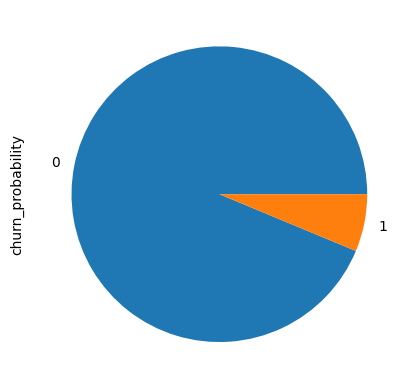

In [376]:
telecom_dataset['churn_probability'].value_counts().plot.pie()
plt.show()

In [377]:
churn_per = ( len(telecom_dataset[telecom_dataset.churn_probability==1])/len(telecom_dataset) ) * 100
print("Percentage of Churn Customer =",churn_per)
non_churn_per = ( len(telecom_dataset[telecom_dataset.churn_probability==0])/len(telecom_dataset) ) * 100
print("Percentage of Non-churn Customer =",non_churn_per)

Percentage of Churn Customer = 6.275294005618245
Percentage of Non-churn Customer = 93.72470599438175


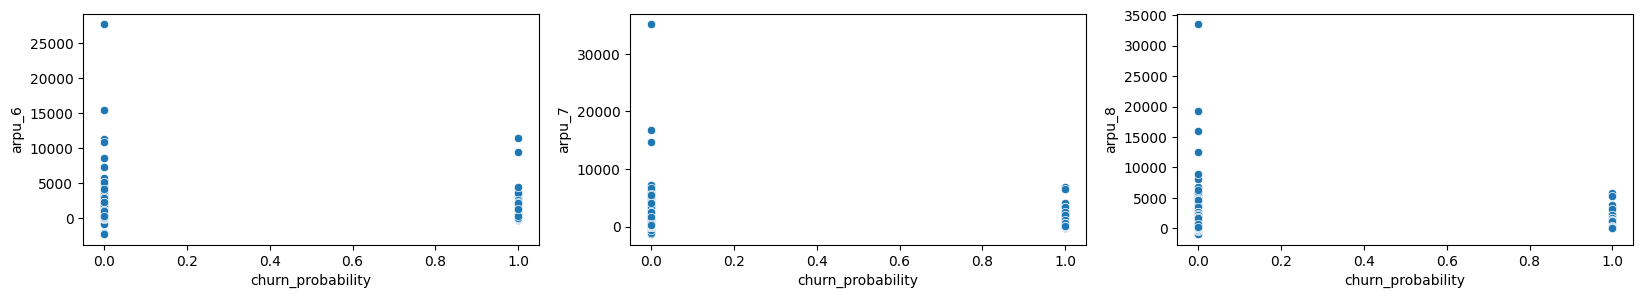

In [378]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="arpu_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="arpu_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="arpu_8")
plt.show()

##### Customers who have more average revenue per user in month of august are high value customer

In [379]:
#telecom_dataset['total_data_rech_amt_6'] = telecom_dataset['total_rech_data_6'] * telecom_dataset['av_rech_amt_data_6']
#telecom_dataset['total_data_rech_amt_7'] = telecom_dataset['total_rech_data_7'] * telecom_dataset['av_rech_amt_data_7']
#telecom_dataset['total_data_rech_amt_8'] = telecom_dataset['total_rech_data_8'] * telecom_dataset['av_rech_amt_data_8']
#telecom_dataset['total_rech_6'] = telecom_dataset['total_data_rech_amt_6'] + telecom_dataset['total_rech_amt_6']
#telecom_dataset['total_rech_7'] = telecom_dataset['total_data_rech_amt_7'] + telecom_dataset['total_rech_amt_7']
#telecom_dataset['total_rech_8'] = telecom_dataset['total_data_rech_amt_8'] + telecom_dataset['total_rech_amt_8']
#telecom_dataset.head(10)

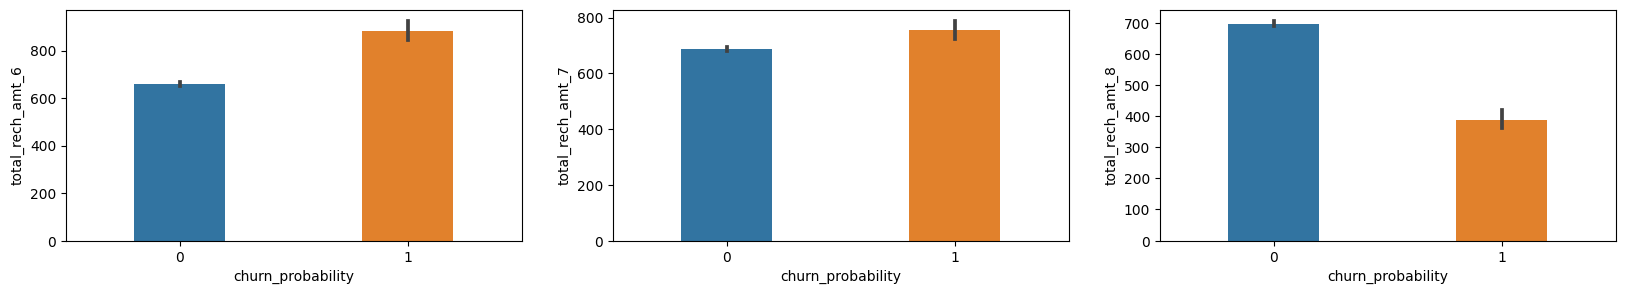

In [380]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="total_rech_amt_6",width=0.4)
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="total_rech_amt_7",width=0.4)
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="total_rech_amt_8",width=0.4)
plt.show()

##### It is observed that customers with good recharge amount in August are high value customer

In [381]:
## Add all roaming incoming and outgoing columns and add a new column 
telecom_dataset['roam_any_6'] = telecom_dataset['roam_ic_mou_6'] + telecom_dataset['roam_og_mou_6'] 
telecom_dataset['roam_any_7'] = telecom_dataset['roam_ic_mou_7'] + telecom_dataset['roam_og_mou_7'] 
telecom_dataset['roam_any_8'] = telecom_dataset['roam_ic_mou_8'] + telecom_dataset['roam_og_mou_8'] 

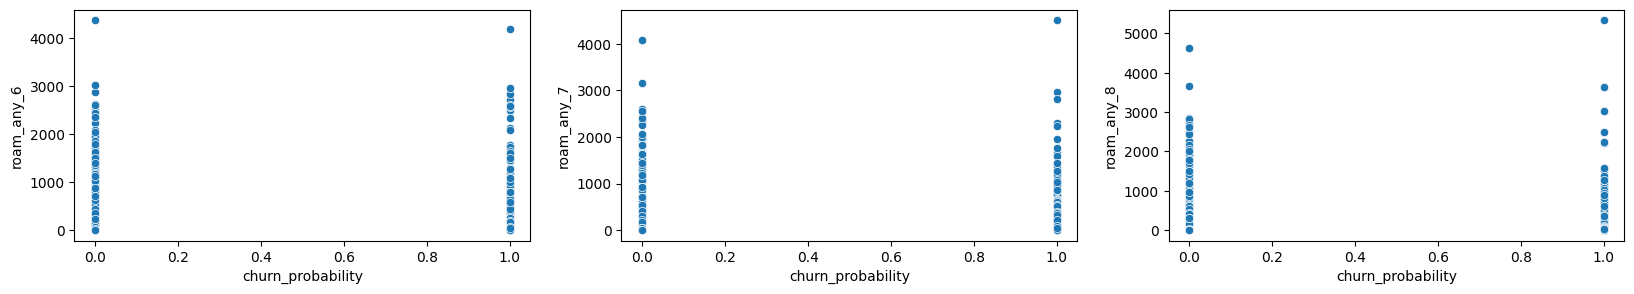

In [382]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="roam_any_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="roam_any_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="roam_any_8")
plt.show()

#### It is observed that customers who have used more raoming pack in june, are high likely to churn

In [383]:
# dropping all roaming incoming and outgoing columns
telecom_dataset = telecom_dataset.drop(columns=['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'])

In [384]:
## Add all local incoming and outgoing columns and add a new column 
telecom_dataset['local_any_6'] = telecom_dataset.loc_og_t2t_mou_6 + telecom_dataset.loc_og_t2m_mou_6 + telecom_dataset.loc_og_t2f_mou_6 + telecom_dataset.loc_og_t2c_mou_6 + telecom_dataset.loc_og_mou_6 + telecom_dataset.loc_ic_t2t_mou_6 + telecom_dataset.loc_ic_t2m_mou_6 + telecom_dataset.loc_ic_t2f_mou_6+ telecom_dataset.loc_ic_mou_6
telecom_dataset['local_any_7'] = telecom_dataset.loc_og_t2t_mou_7 + telecom_dataset.loc_og_t2m_mou_7 + telecom_dataset.loc_og_t2f_mou_7 + telecom_dataset.loc_og_t2c_mou_7 + telecom_dataset.loc_og_mou_7 + telecom_dataset.loc_ic_t2t_mou_7 + telecom_dataset.loc_ic_t2m_mou_7 + telecom_dataset.loc_ic_t2f_mou_7+ telecom_dataset.loc_ic_mou_7
telecom_dataset['local_any_8'] = telecom_dataset.loc_og_t2t_mou_8 + telecom_dataset.loc_og_t2m_mou_8 + telecom_dataset.loc_og_t2f_mou_8 + telecom_dataset.loc_og_t2c_mou_8 + telecom_dataset.loc_og_mou_8 + telecom_dataset.loc_ic_t2t_mou_8 + telecom_dataset.loc_ic_t2m_mou_8 + telecom_dataset.loc_ic_t2f_mou_8+ telecom_dataset.loc_ic_mou_8

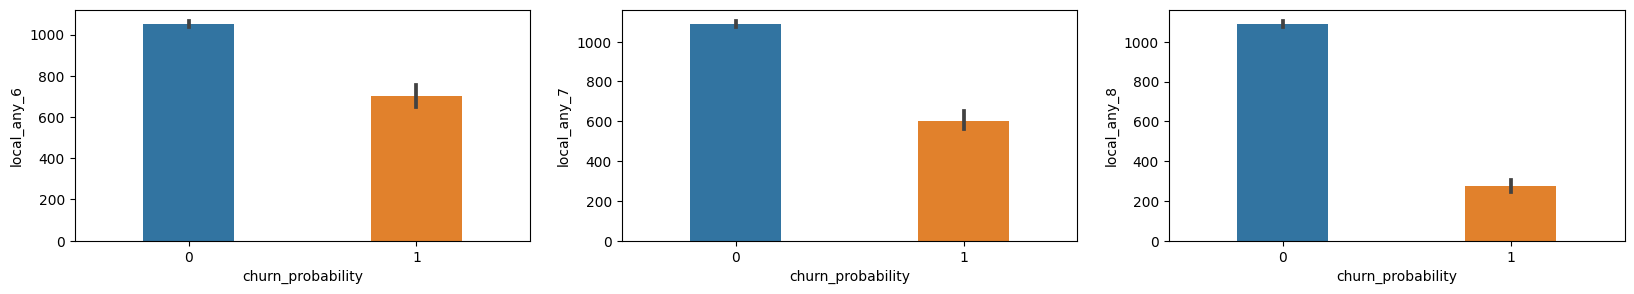

In [385]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="local_any_6",width=0.4)
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="local_any_7",width=0.4)
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="local_any_8",width=0.4)
plt.show()

#### It is observed that more customers with local usage in june and july, are highly likely to churn

In [386]:
#dropping local incoming and outgoing coloumns
telecom_dataset = telecom_dataset.drop(columns=['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'])

In [387]:
## Add all standard incoming and outgoing columns and add a new column 
telecom_dataset['std_any_6'] = telecom_dataset.std_og_t2t_mou_6 + telecom_dataset.std_og_t2m_mou_6 + telecom_dataset.std_og_t2f_mou_6 + telecom_dataset.std_og_mou_6 + telecom_dataset.std_ic_t2t_mou_6 + telecom_dataset.std_ic_t2m_mou_6 + telecom_dataset.std_ic_t2f_mou_6 + telecom_dataset.std_ic_mou_6
telecom_dataset['std_any_7'] = telecom_dataset.std_og_t2t_mou_7 + telecom_dataset.std_og_t2m_mou_7 + telecom_dataset.std_og_t2f_mou_7 + telecom_dataset.std_og_mou_7 + telecom_dataset.std_ic_t2t_mou_7 + telecom_dataset.std_ic_t2m_mou_7 + telecom_dataset.std_ic_t2f_mou_7 + telecom_dataset.std_ic_mou_7
telecom_dataset['std_any_8'] = telecom_dataset.std_og_t2t_mou_8 + telecom_dataset.std_og_t2m_mou_8 + telecom_dataset.std_og_t2f_mou_8 + telecom_dataset.std_og_mou_8 + telecom_dataset.std_ic_t2t_mou_8 + telecom_dataset.std_ic_t2m_mou_8 + telecom_dataset.std_ic_t2f_mou_8 + telecom_dataset.std_ic_mou_8

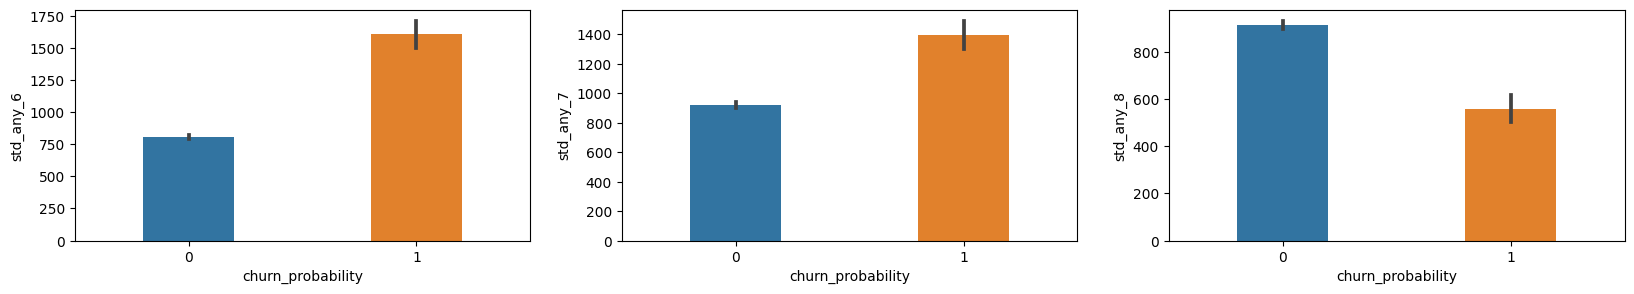

In [388]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="std_any_6",width=0.4)
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="std_any_7",width=0.4)
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="std_any_8",width=0.4)
plt.show()

#### It is observed that more customers with standard usage in june and july, are highly likely to churn

In [389]:
#dropping standard incoming and outgoing coloumns
telecom_dataset = telecom_dataset.drop(columns=['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'])

In [390]:
## Add all standard incoming and outgoing columns and add a new column 
telecom_dataset['spl_any_6'] = telecom_dataset.isd_og_mou_6 + telecom_dataset.spl_og_mou_6 + telecom_dataset.og_others_6 + telecom_dataset.spl_ic_mou_6 + telecom_dataset.isd_ic_mou_6 + telecom_dataset.ic_others_6
telecom_dataset['spl_any_7'] = telecom_dataset.isd_og_mou_7 + telecom_dataset.spl_og_mou_7 + telecom_dataset.og_others_7 + telecom_dataset.spl_ic_mou_7 + telecom_dataset.isd_ic_mou_7 + telecom_dataset.ic_others_7
telecom_dataset['spl_any_8'] = telecom_dataset.isd_og_mou_8 + telecom_dataset.spl_og_mou_8 + telecom_dataset.og_others_8 + telecom_dataset.spl_ic_mou_8 + telecom_dataset.isd_ic_mou_8 + telecom_dataset.ic_others_8

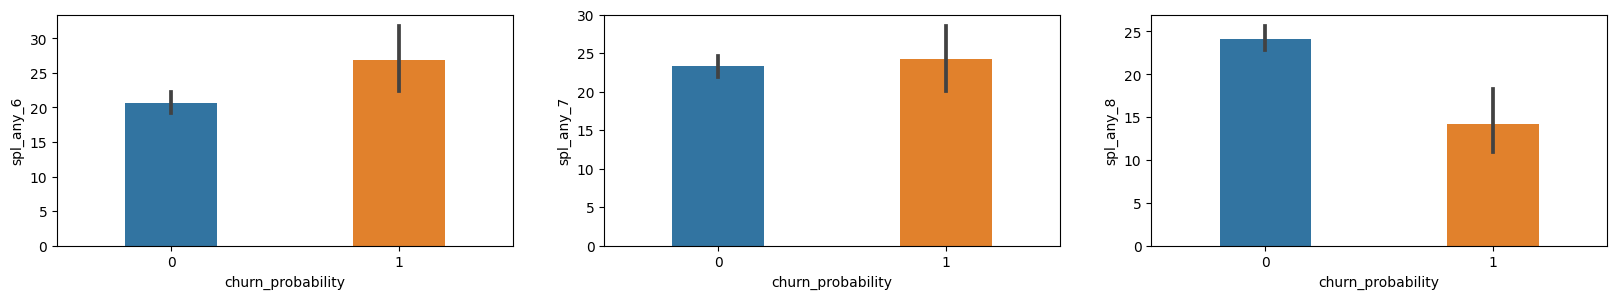

In [391]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="spl_any_6",width=0.4)
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="spl_any_7",width=0.4)
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="spl_any_8",width=0.4)
plt.show()

#### It is observed that more customers with special usage in august, are high value customers

In [392]:
## dropping all standard incoming and outgoing columns
telecom_dataset = telecom_dataset.drop(columns=['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'])

In [393]:
## Add all data 2g and 3g columns and add a new column 
telecom_dataset['data_used_6'] = telecom_dataset.vol_2g_mb_6 + telecom_dataset.vol_3g_mb_6 + telecom_dataset.jun_vbc_3g
telecom_dataset['data_used_7'] = telecom_dataset.vol_2g_mb_7 + telecom_dataset.vol_3g_mb_7 + telecom_dataset.jul_vbc_3g
telecom_dataset['data_used_8'] = telecom_dataset.vol_2g_mb_8 + telecom_dataset.vol_3g_mb_8 + telecom_dataset.aug_vbc_3g

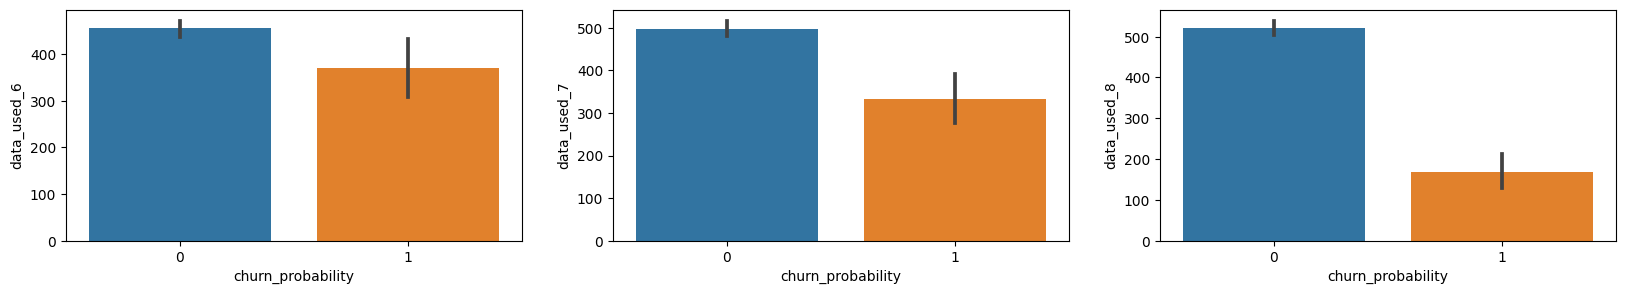

In [394]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="data_used_6")
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="data_used_7")
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="data_used_8")
plt.show()

#### It is observed that more customers with data usage in july, are high value customers

In [395]:
# dropping all data 2g and 3g columns
telecom_dataset = telecom_dataset.drop(columns=['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'])
telecom_dataset = telecom_dataset.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'])


In [396]:
telecom_dataset.shape

(21003, 83)

## Scaling

In [397]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21003 entries, 12 to 69996
Data columns (total 83 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21003 non-null  int64  
 1   circle_id             21003 non-null  int64  
 2   loc_og_t2o_mou        21003 non-null  float64
 3   std_og_t2o_mou        21003 non-null  float64
 4   loc_ic_t2o_mou        21003 non-null  float64
 5   arpu_6                21003 non-null  float64
 6   arpu_7                21003 non-null  float64
 7   arpu_8                21003 non-null  float64
 8   onnet_mou_6           21003 non-null  float64
 9   onnet_mou_7           21003 non-null  float64
 10  onnet_mou_8           21003 non-null  float64
 11  offnet_mou_6          21003 non-null  float64
 12  offnet_mou_7          21003 non-null  float64
 13  offnet_mou_8          21003 non-null  float64
 14  std_og_t2c_mou_6      21003 non-null  float64
 15  std_og_t2c_mou_7  

In [398]:
X = telecom_dataset.drop(['churn_probability'], axis=1)

X.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
12,12,109,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,...,159.50,1559.97,1647.10,1269.27,0.00,0.00,0.00,0.00,0.0,0.00
15,15,109,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,...,2030.39,0.00,2.06,12.52,0.18,0.00,0.00,260.42,0.0,354.35
23,23,109,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,...,1181.34,818.22,0.00,0.00,0.13,0.20,0.41,0.00,0.0,0.00
24,24,109,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,...,601.82,757.70,595.70,287.44,0.00,0.00,0.36,0.04,0.0,0.00
25,25,109,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,...,1481.96,852.05,268.36,854.06,4.01,6.68,44.52,0.00,0.0,0.00


In [399]:
y = telecom_dataset['churn_probability'] # response variable in Y

y.head()

12    0
15    0
23    0
24    0
25    0
Name: churn_probability, dtype: int64

In [400]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [401]:
#Finding numerical columns
numeric_columns = telecom_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('churn_probability')

In [402]:
# scaling the features - necessary before PCA
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.fit_transform(X_test[numeric_columns])
X_train.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
46752,0.575130,0.0,0.0,0.0,0.0,-0.760540,-0.019041,-0.108279,-0.457411,-0.332910,...,0.999165,-0.602731,-0.322290,-0.311092,-0.097865,-0.177636,-0.194297,-0.36784,-0.399728,-0.39917
66155,1.540904,0.0,0.0,0.0,0.0,0.055090,0.582803,-0.572001,-0.424246,-0.504270,...,0.808591,-0.600913,-0.687097,-0.636645,-0.178592,-0.127246,-0.248291,-0.36784,-0.399728,-0.39917
54159,0.943809,0.0,0.0,0.0,0.0,-0.196206,-0.321763,-0.778980,-0.558156,-0.429504,...,-0.760131,0.895834,0.592930,-0.064718,0.245903,-0.218045,-0.248291,-0.36784,-0.399728,-0.39917
5101,-1.498027,0.0,0.0,0.0,0.0,-0.655806,-0.259400,-0.280428,0.029775,0.932998,...,-0.715483,-0.043568,0.589643,0.349530,-0.178311,-0.161453,-0.216950,-0.36784,-0.399728,-0.39917
49170,0.695484,0.0,0.0,0.0,0.0,-0.428819,-0.519405,-0.006833,0.094706,0.064971,...,0.642726,-0.669264,-0.703333,-0.661411,-0.198984,-0.230643,-0.248291,-0.36784,-0.399728,-0.39917


## PCA 

In [405]:
pca = PCA(random_state=42)
pca.fit(X_train)
pca.components_

array([[ 2.55841606e-03, -5.55111512e-17, -0.00000000e+00, ...,
         2.14271651e-01,  2.27905427e-01,  2.21089829e-01],
       [ 1.40355607e-03, -5.55111512e-17,  2.77555756e-17, ...,
         2.62924533e-03,  6.12592599e-03,  7.26346112e-03],
       [-3.21964841e-04, -3.46944695e-17, -1.38777878e-17, ...,
        -6.07861637e-02, -6.05483532e-02, -5.92683787e-02],
       ...,
       [-0.00000000e+00, -1.46281703e-01,  1.18712487e-01, ...,
        -1.11022302e-16, -2.77555756e-17, -5.55111512e-17],
       [ 0.00000000e+00, -7.51567676e-02,  2.51754206e-03, ...,
        -1.07552856e-16,  7.28583860e-17, -2.08166817e-17],
       [-0.00000000e+00,  5.22882297e-02, -8.68595431e-02, ...,
         4.16333634e-17, -9.71445147e-17,  8.32667268e-17]])

Looking at the explained variance ratio for each component

In [406]:
pca.explained_variance_ratio_

array([1.60073358e-01, 1.28404044e-01, 1.03145000e-01, 6.65954008e-02,
       4.93790396e-02, 4.29202329e-02, 3.61641892e-02, 3.54357860e-02,
       3.21910389e-02, 2.80385452e-02, 2.74042922e-02, 2.25719565e-02,
       2.19721026e-02, 1.92307502e-02, 1.49635026e-02, 1.39786342e-02,
       1.38863048e-02, 1.28620157e-02, 1.18541397e-02, 1.14715806e-02,
       1.11350529e-02, 1.06964094e-02, 9.30698645e-03, 9.23686409e-03,
       8.11308708e-03, 7.80582256e-03, 7.35460486e-03, 7.23639671e-03,
       6.83341129e-03, 6.72156310e-03, 5.33589140e-03, 5.28745510e-03,
       5.03878182e-03, 4.59063929e-03, 4.47162008e-03, 3.69449941e-03,
       3.49101598e-03, 3.31848945e-03, 2.90774553e-03, 2.43877708e-03,
       2.33382610e-03, 2.21457451e-03, 2.08588787e-03, 2.03914581e-03,
       1.91699229e-03, 1.85252968e-03, 1.78757690e-03, 1.66278979e-03,
       1.50501250e-03, 1.31933876e-03, 9.36129617e-04, 7.61887597e-04,
       6.64297320e-04, 5.37158075e-04, 3.77674036e-04, 3.50929548e-04,
      

In [407]:
## Verifying PC and variables
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(20)

,PC1,PC2,Feature
0,2.558416e-03,1.403556e-03,id
1,-5.551115e-17,-5.551115e-17,circle_id
2,-0.000000e+00,2.775558e-17,loc_og_t2o_mou
3,-0.000000e+00,0.000000e+00,std_og_t2o_mou
4,2.775558e-17,1.110223e-16,loc_ic_t2o_mou
5,7.111038e-02,2.371238e-01,arpu_6
6,7.320659e-02,2.643457e-01,arpu_7
7,7.263990e-02,2.424659e-01,arpu_8
8,-5.337632e-02,1.362103e-01,onnet_mou_6
9,-5.818537e-02,1.487049e-01,onnet_mou_7


Making a scree plot for the explained variance

In [408]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

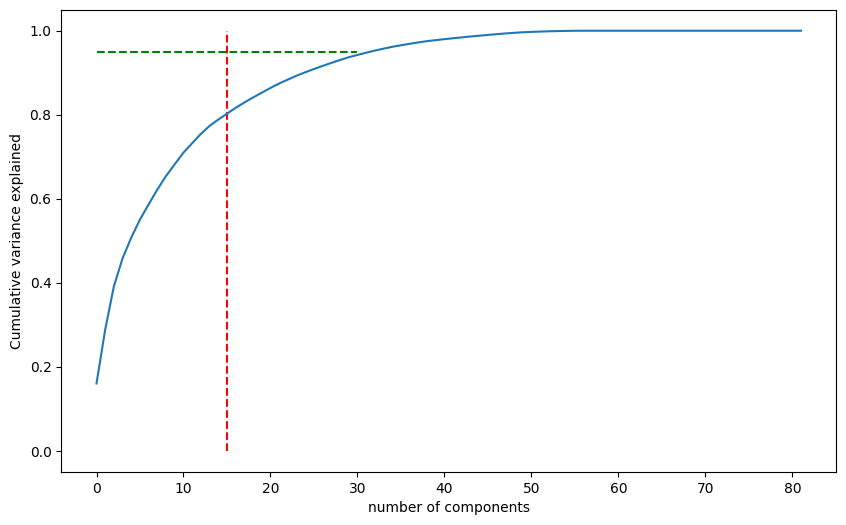

In [413]:
fig = plt.figure(figsize=[10,6])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel('number of components')
plt.show()

Perform PCA with 20 components

In [417]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=20)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(14702, 20)

<AxesSubplot:>

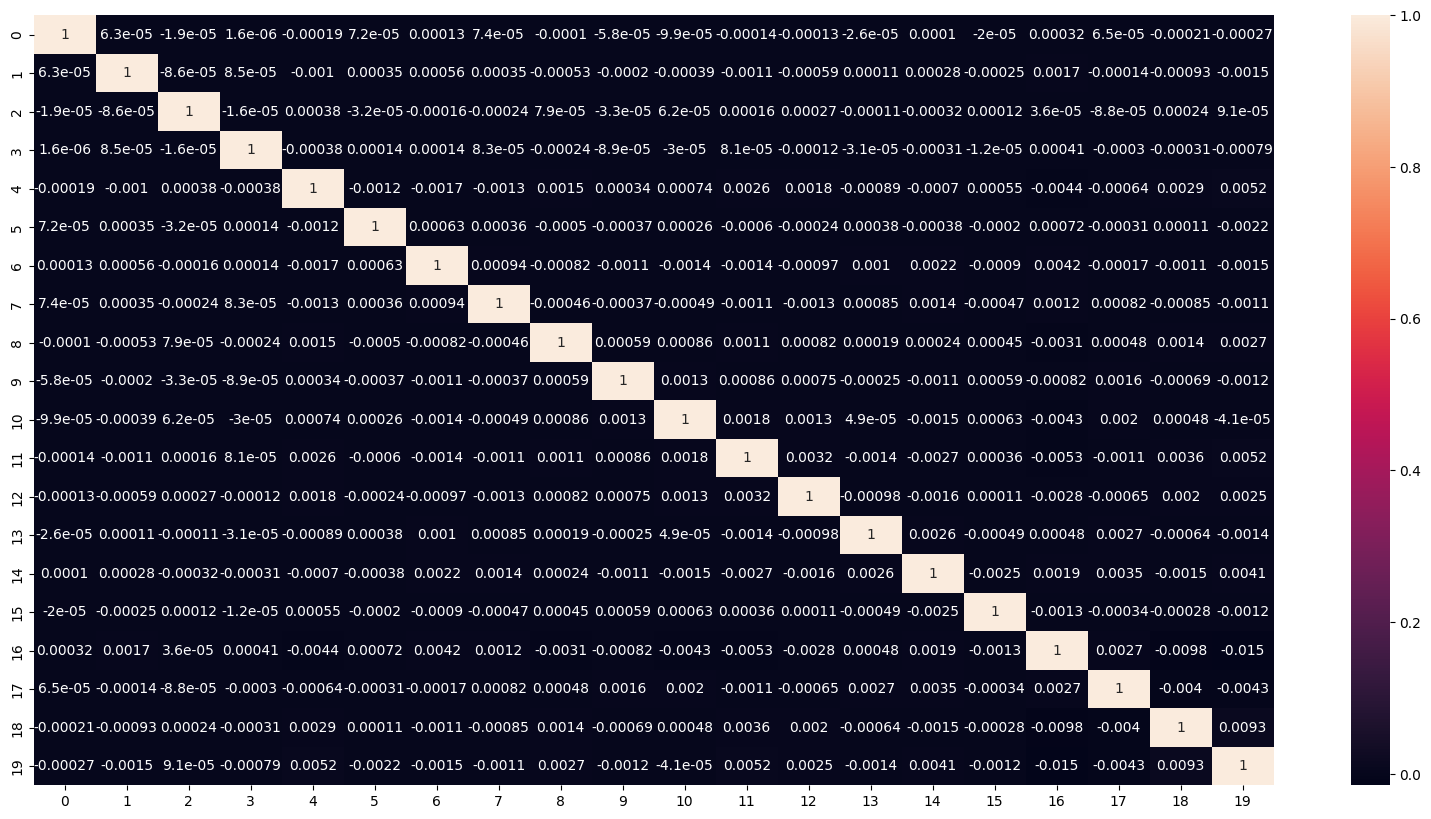

In [422]:
#plotting the correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())
plt.figure(figsize=[20,10])
sns.heatmap(corrmat, annot=True)